## [INTRODUCTION](#introduction)
* ### [Purpose](#purpose) 
* ### [Dataset](#dataset)

## [A FIRST LOOK AT THE DATASET](#firstLook)
* ### [Importing Libraries and Reading the Dataset](#importAndRead) 
* ### [Basic Information about Dataset](#basicInfo) 
* ### [Correlation between All Columns](#correlation) 

## [DATA VISUALIZATION TO UNDERSTAND THE DATASET](#visualization )

## [REGRESSION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS)](#regression)
* ### [Preparing Data for Regression](#prepareForRegression) 
* ### [Linear Regression](#linearRegression) 
* ### [Random Forest Regression](#rfRegression) 
* ### [Decision Tree Regression](#dtRegression) 
* ### [Comparison of Regression Algorithms](#comparisonOfRegression) 

## [CLASSIFICATION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS)](#classification)
* ### [Preparing Data for Classification](#prepareForClassification) 
* ### [Logistic Regression](#lr) 
* ### [Support Vector Machine](#svm) 
* ### [Gaussian Naive Bayes](#gnb)
* ### [Decision Tree Classification](#dtc) 
* ### [Random Forest Classification](#rfc) 
* ### [K Nearest Neighbors Classification](#knnc)  
* ### [Comparison of Classification Algorithms](#comparisonOfClassification) 

## [CLUSTERING ALGORITHMS (UNSUPERVISED MACHINE LEARNING ALGORITHMS)](#clustering)
* ### [Preparing Data for Clustering](#prepareForClustering) 
* ### [Principal Component Analysis](#pca) 
* ### [K-means Clustering](#kmeans) 
* ### [Hierarchical Clustering](#hierarchical ) 
* ### [Comparison of Clustering Algorithms](#comparisonOfClustering) 

## [THE THREE IMPORTANT FEATURES](#feature)
* ### [Correlation between All Columns](#correlationForFeature) 
* ### [The Three Features for Linear Regression](#ThreeLinearRegression) 

## <a id='introduction'>INTRODUCTION</a>

### <a id='purpose'>Purpose</a>

To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.

### <a id='dataset'>Dataset</a>

This dataset is created for prediction of graduate admissions and the dataset link is below: 
* https://www.kaggle.com/mohansacharya/graduate-admissions

Features in the dataset:
* GRE Scores (290 to 340) 
* TOEFL Scores (92 to 120) 
* University Rating (1 to 5) 
* Statement of Purpose (1 to 5) 
* Letter of Recommendation Strength (1 to 5) 
* Undergraduate CGPA (6.8 to 9.92) 
* Research Experience (0 or 1) 
* Chance of Admit (0.34 to 0.97)

## <a id='firstLook'>A FIRST LOOK AT THE DATASET</a>

### <a id='importAndRead'>Importing Libraries and Reading the Dataset</a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [2]:
df = pd.read_csv("Admission_Predict.csv",sep = ",")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### <a id='basicInfo'>Basic Information about Dataset</a>



Some important information:
* There are 9 columns: Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit
* There are no null records. It's good.
* There are 400 samples in total. That's enough.

In [5]:
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

In [6]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

df.info ():
* It was used to find the number of samples and the number of features. 
* There is no string or null data.
* Data types are int64 and float64.
* Memory usage: 28.2 KB

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


df.head() and df.tail():
* They are good to test if a feature is useful for future works.
* Serial No. may be deleted because it stores index values. In the future this column does not benefit.

In [8]:
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


### <a id='correlation'>Correlation between All Columns</a>

* The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE wrt Chance of Admit
* The 3 least important features for admission to the Master: Research, LOR, and SOP wrt Chance of Admit

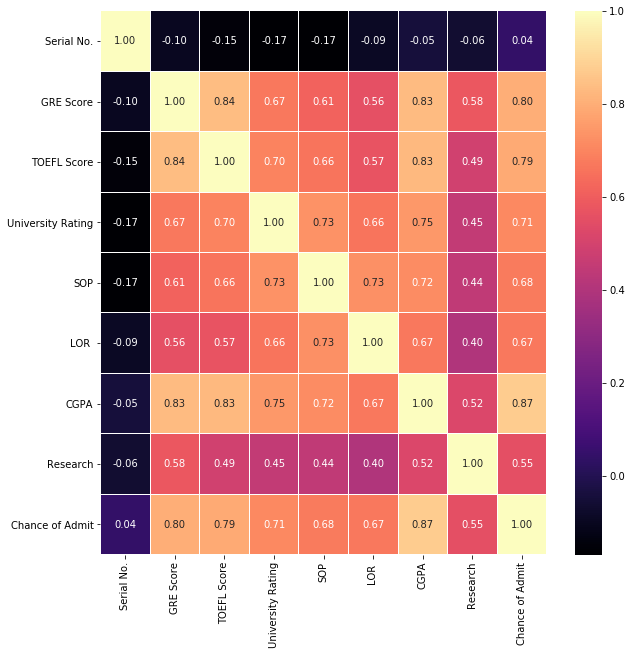

In [9]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

## <a id='visualization'>DATA VISUALIZATION TO UNDERSTAND THE DATASET</a>

Having Research or not:
* The majority of the candidates in the dataset have research experience.
* Therefore, the Research will be a unimportant feature for the Chance of Admit. The correlation between Chance of Admit and Research was already lower than other correlation values.

Not Having Research: 181
Having Research: 219


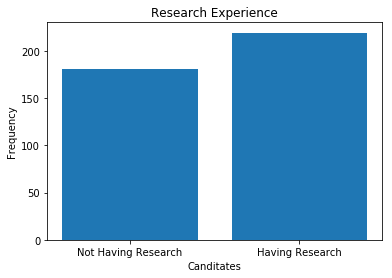

In [10]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

TOEFL Score:
* The lowest TOEFL score is 92 and the highest Toefl score is 120. The average is 107.41.

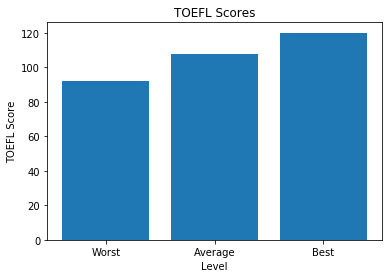

In [11]:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

GRE Score:
* This histogram shows the frequency for GRE scores.
* There is a density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.

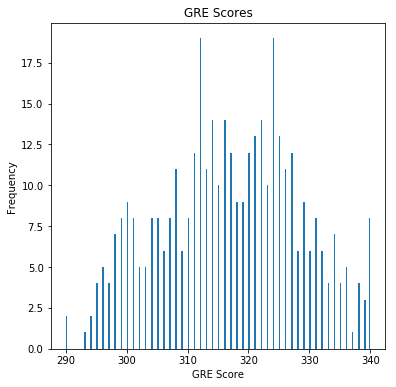

In [12]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

CGPA Scores for University Ratings:
* As the quality of the university increases, the CGPA score increases.
Students from good rated universities are scoring higher GPAs.

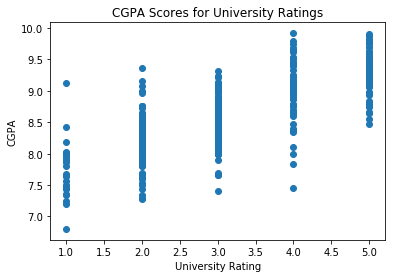

In [53]:
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

* Candidates with high GRE scores usually have a high CGPA score.

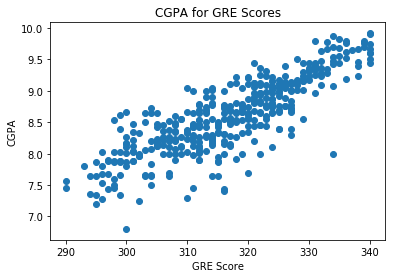

In [54]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

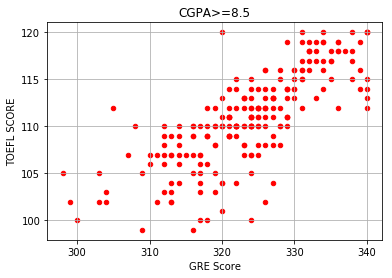

In [15]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

* Candidates who graduate from good universities are more fortunate to be accepted.

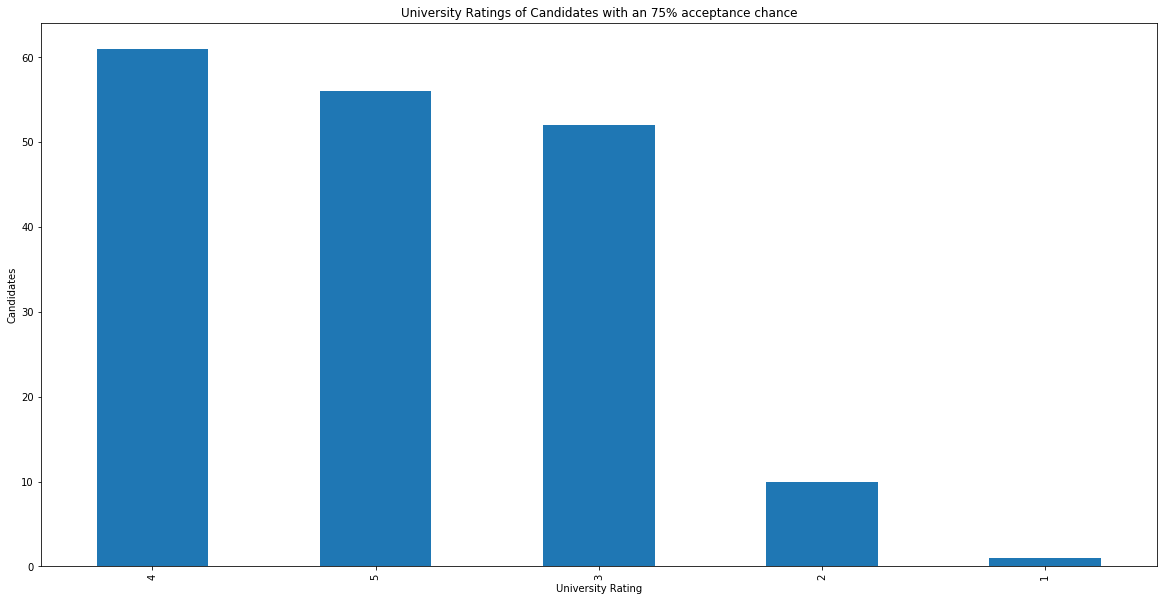

In [16]:
s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

* Candidates with high CGPA scores usually have a high SOP score.

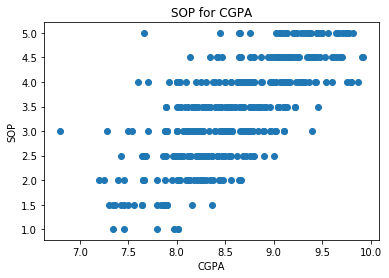

In [17]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

* Candidates with high GRE scores usually have a high SOP score.

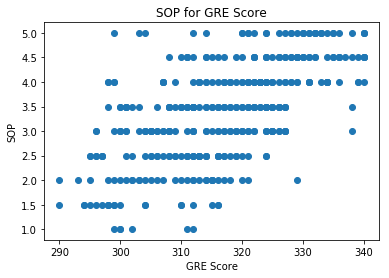

In [18]:
plt.scatter(df["GRE Score"],df["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

## <a id='regression'>REGRESSION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS</a>

### <a id='prepareForRegression'>Preparing Data for Regression</a>

* Serial No. is deleted because it stores index values. In the future this column does not benefit for regression algorithms.

In [20]:
# reading the dataset
df = pd.read_csv("Admission_Predict.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

train_test_split:
* It splits the data into random train (80%) and test (20%) subsets.

In [21]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

Normalization (min-max scaling):
* It makes values  scaled to a fixed range (0-1).

In [22]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/melon/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Note about r2_score:
* It is the regression score function. 
* The best possible score is 1.0 for r2_score.
* It may be negative.

### <a id='linearRegression'>Linear Regression</a>

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("Checking the prediction for the first two values of the dataset:\n")
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score

print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

Checking the prediction for the first two values of the dataset:

real value of y_test[1]: 0.68 -> the predict: [0.72368741]
real value of y_test[2]: 0.9 -> the predict: [0.93536809]
r_square score:  0.821208259148699
r_square score (train dataset):  0.7951946003191086


### <a id='rfRegression'>Random Forest Regression</a>

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

/Users/melon/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


r_square score:  0.8073274403323057
real value of y_test[1]: 0.68 -> the predict: [0.7249]
real value of y_test[2]: 0.9 -> the predict: [0.9407]
r_square score (train dataset):  0.9635518168808686


### <a id='dtRegression'>Decision Tree Regression</a>

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_square score:  0.6267429864554561
real value of y_test[1]: 0.68 -> the predict: [0.73]
real value of y_test[2]: 0.9 -> the predict: [0.94]
r_square score (train dataset):  1.0


### <a id='comparisonOfRegression'>Comparison of Regression Algorithms</a>

* Linear regression and random forest regression algorithms were better than decision tree regression algorithm.

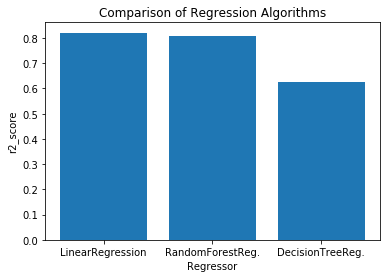

In [26]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

* These are the regression estimates for samples with 5 and 50 indexes:

In [27]:
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(lr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[5],:])))

print()

print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(lr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[50],:])))

real value of y_test[5]: 0.94 -> the predict: [0.92863016]
real value of y_test[5]: 0.94 -> the predict: [0.9167]
real value of y_test[5]: 0.94 -> the predict: [0.91]

real value of y_test[50]: 0.86 -> the predict: [0.89624998]
real value of y_test[50]: 0.86 -> the predict: [0.9111]
real value of y_test[50]: 0.86 -> the predict: [0.93]


This is the estimate and the actual acceptance possibilities made with 3 regression algorithms for test samples with 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75 indexes:

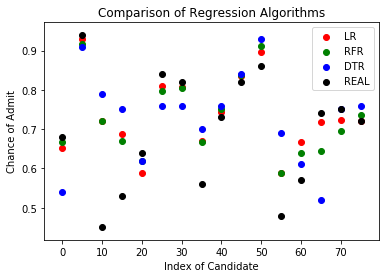

In [28]:
red = plt.scatter(np.arange(0,80,5),y_head_lr[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

Comment:
* Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted.

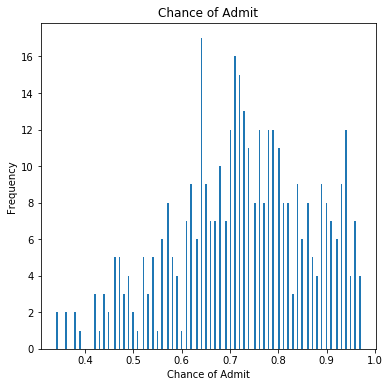

In [29]:
df["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

## <a id='classification'>CLASSIFICATION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS)</a>

### <a id='prepareForClassification'>Preparing Data for Classification</a>

* If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
* If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

In [30]:
# reading the dataset
df = pd.read_csv("Admission_Predict.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/melon/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

Note about score:
* It is the mean accuracy for test data and labels.

Note about precision:
* precision =  TP / (TP + FP)

Note about recall:
* recall = TP / (TP + FN)

Note about F!:
* F1 = 2 / ((1/precision)+(1/recall))

### <a id='lr'>Logistic Regression</a>

Confusion Matrix:

For Actual 1: 29
* Predicted 1: 22
* Predicted 0: 7
* According to Confusion Matrix, the model predicted that 23 candidate's Chances of Admit are greater than 80%. In reality, 22 of them have a Chance of Admit greater than 80%. In total, 29 candidate's Chances of Admit are greater than 80%.

For Actual 0: 51
* Predicted 1: 1
* Predicted 0: 50
* According to Confusion Matrix, the model predicted that 57 candidate's Chances of Admit are less than or equal to 80%. In reality, 50 of them have a Chance of Admit less than or equal to 80%. In total, 51 candidate's Chances of Admit are less than or equal to 80%.

score:  0.9
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


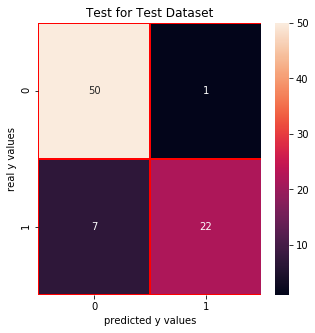

precision_score:  0.9565217391304348
recall_score:  0.7586206896551724
f1_score:  0.8461538461538461


In [31]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train,y_train_01)
print("score: ", lrc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01,lrc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,lrc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,lrc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,lrc.predict(x_test)))

Test for Train Dataset:

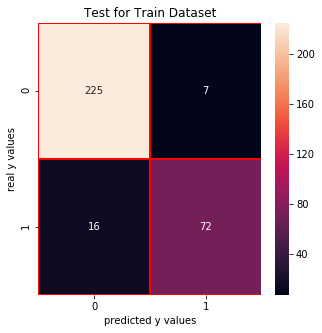

In [32]:
cm_lrc_train = confusion_matrix(y_train_01,lrc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### <a id='svm'>Support Vector Machine</a>

Confusion Matrix:

For Actual 1: 29
* Predicted 1: 22
* Predicted 0: 7

For Actual 0: 51
* Predicted 1: 1
* Predicted 0: 50

score:  0.9
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


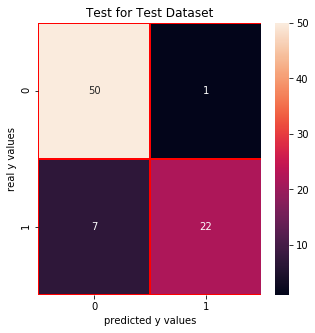

precision_score:  0.9565217391304348
recall_score:  0.7586206896551724
f1_score:  0.8461538461538461


In [33]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train_01)
print("score: ", svm.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(svm.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(svm.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,svm.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,svm.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,svm.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,svm.predict(x_test)))

Test for Train Dataset:

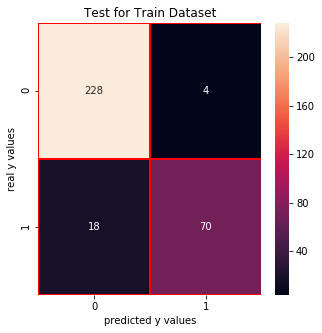

In [34]:
cm_svm_train = confusion_matrix(y_train_01,svm.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### <a id='gnb'>Gaussian Naive Bayes</a>

Confusion Matrix:

For Actual 1: 29
* Predicted 1: 28
* Predicted 0: 1

For Actual 0: 51
* Predicted 1: 2
* Predicted 0: 49

score:  0.9625
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


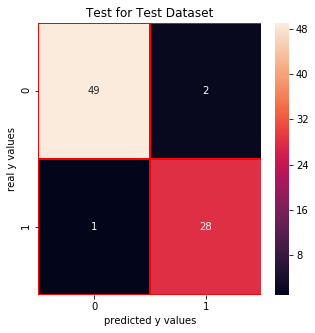

precision_score:  0.9333333333333333
recall_score:  0.9655172413793104
f1_score:  0.9491525423728815


In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train_01)
print("score: ", nb.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(nb.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(nb.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01,nb.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,nb.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,nb.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,nb.predict(x_test)))

Test for Train Dataset:

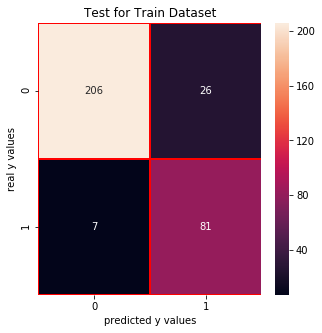

In [36]:
cm_nb_train = confusion_matrix(y_train_01,nb.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### <a id='dtc'>Decision Tree Classification</a>

Confusion Matrix:

For Actual 1: 29
* Predicted 1: 26
* Predicted 0: 3

For Actual 0: 51
* Predicted 1: 1
* Predicted 0: 50

score:  0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


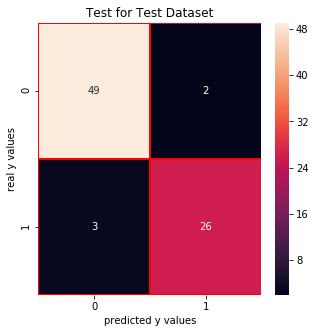

precision_score:  0.9285714285714286
recall_score:  0.896551724137931
f1_score:  0.912280701754386


In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_01)
print("score: ", dtc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01,dtc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,dtc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,dtc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,dtc.predict(x_test)))

Test for Train Dataset:

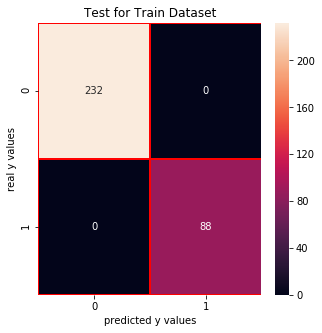

In [38]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### <a id='rfc'>Random Forest Classification</a>

Confusion Matrix:

For Actual 1: 29
* Predicted 1: 25
* Predicted 0: 4

For Actual 0: 51
* Predicted 1: 1
* Predicted 0: 50

score:  0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


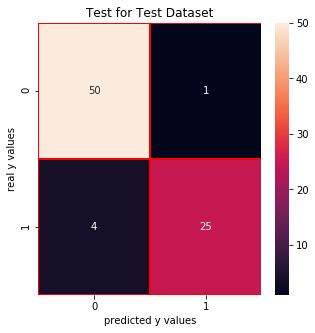

precision_score:  0.9615384615384616
recall_score:  0.8620689655172413
f1_score:  0.9090909090909091


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(x_train,y_train_01)
print("score: ", rfc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01,rfc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,rfc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,rfc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,rfc.predict(x_test)))

Test for Train Dataset:

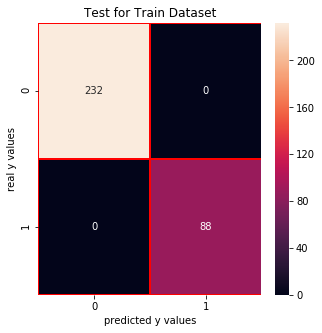

In [40]:
cm_rfc_train = confusion_matrix(y_train_01,rfc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### <a id='knnc'>K Nearest Neighbors Classification</a>


Finding the k value:
* As a result of the test, the best k value is 3.

Confusion Matrix:

For Actual 1: 29
* Predicted 1: 26
* Predicted 0: 3

For Actual 0: 51
* Predicted 1: 2
* Predicted 0: 49

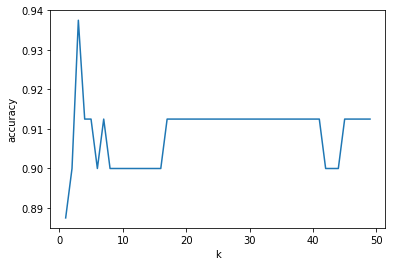

score of 3 : 0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


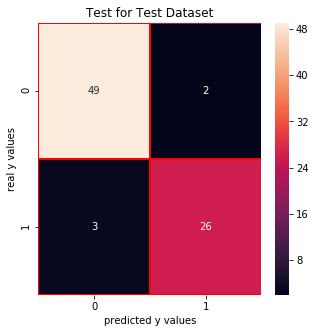

precision_score:  0.9285714285714286
recall_score:  0.896551724137931
f1_score:  0.912280701754386


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train_01)
    scores.append(knn_n.score(x_test,y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train_01)
print("score of 3 :",knn.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(knn.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(knn.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01,knn.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,knn.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,knn.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,knn.predict(x_test)))

Test for Train Dataset:

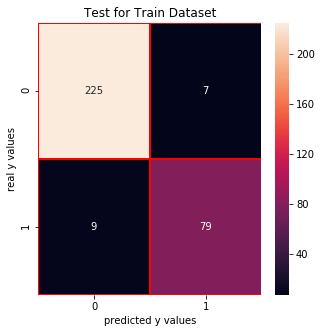

In [42]:
cm_knn_train = confusion_matrix(y_train_01,knn.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### <a id='comparisonOfClassification'>Comparison of Classification Algorithms</a>

* All classification algorithms achieved around 90% success. The most successful one is Gaussian Naive Bayes with 96% score.

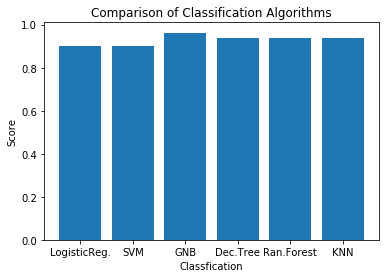

In [43]:
y = np.array([lrc.score(x_test,y_test_01),svm.score(x_test,y_test_01),nb.score(x_test,y_test_01),dtc.score(x_test,y_test_01),rfc.score(x_test,y_test_01),knn.score(x_test,y_test_01)])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
x = ["LogisticReg.","SVM","GNB","Dec.Tree","Ran.Forest","KNN"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()

## <a id='introduction'>CLUSTERING ALGORITHMS (UNSUPERVISED MACHINE LEARNING ALGORITHMS)</a>

### <a id='prepareForClustering'>Preparing Data for Clustering</a>

In [45]:
df = pd.read_csv("Admission_Predict.csv",sep = ",")
df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})
serial = df["Serial No."]
df.drop(["Serial No."],axis=1,inplace = True)
df = (df- np.min(df))/(np.max(df)-np.min(df))
y = df.ChanceOfAdmit 
x = df.drop(["ChanceOfAdmit"],axis=1)

### <a id='pca'>Principal Component Analysis</a>

[](http://)* All features (x) were collected in one feature with Principal Component Analysis.

In [46]:
# for data visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten= True )  # whitten = normalize
pca.fit(x)
x_pca = pca.transform(x)
x_pca = x_pca.reshape(400,)
dictionary = {"x":x_pca,"y":y}
data = pd.DataFrame(dictionary)
print("data:")
print(data.head())
print("\ndf:")
print(df.head())

data:
          x         y
0 -1.377553  0.920635
1 -0.919033  0.666667
2 -0.320986  0.603175
3 -0.520960  0.730159
4  1.137743  0.492063

df:
   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  
0       1.0       0.920635  
1       1.0       0.666667  
2       1.0       0.603175  
3       1.0       0.730159  
4       0.0       0.492063  


### <a id='kmeans'>K-means Clustering</a>

* The elbow method is used to determine the best number of clusters for k-means clustering. The number is 3.

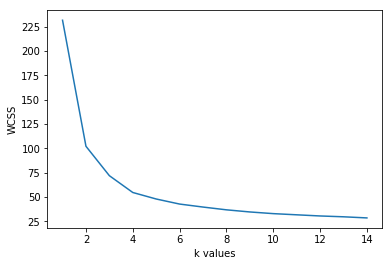

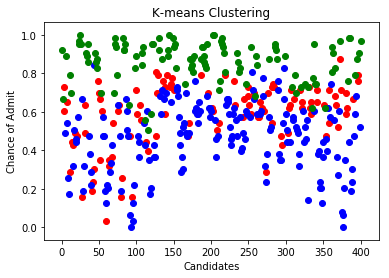

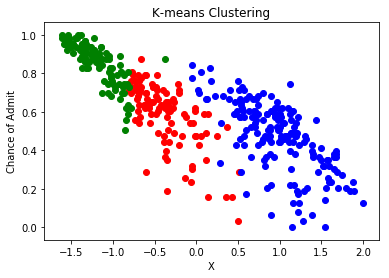

In [47]:
df["Serial No."] = serial
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(x)

df["label_kmeans"] = clusters_knn


plt.scatter(df[df.label_kmeans == 0 ]["Serial No."],df[df.label_kmeans == 0].ChanceOfAdmit,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["Serial No."],df[df.label_kmeans == 1].ChanceOfAdmit,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["Serial No."],df[df.label_kmeans == 2].ChanceOfAdmit,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

df["label_kmeans"] = clusters_knn
plt.scatter(data.x[df.label_kmeans == 0 ],data[df.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[df.label_kmeans == 1 ],data[df.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[df.label_kmeans == 2 ],data[df.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

### <a id='hierarchical '>Hierarchical Clustering</a>

* The dendrogram method is used to determine the best number of clusters for hierarchical clustering. The number is 3 again.

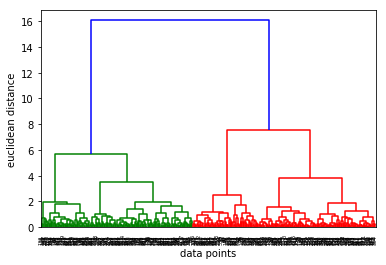

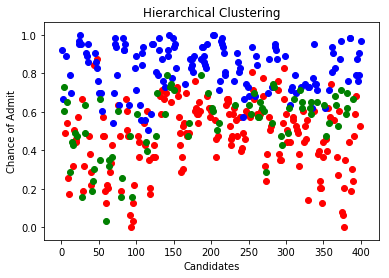

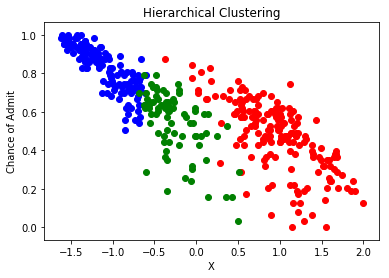

In [48]:
df["Serial No."] = serial

from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(x,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
clusters_hiyerartical = hiyerartical_cluster.fit_predict(x)

df["label_hiyerartical"] = clusters_hiyerartical

plt.scatter(df[df.label_hiyerartical == 0 ]["Serial No."],df[df.label_hiyerartical == 0].ChanceOfAdmit,color = "red")
plt.scatter(df[df.label_hiyerartical == 1 ]["Serial No."],df[df.label_hiyerartical == 1].ChanceOfAdmit,color = "blue")
plt.scatter(df[df.label_hiyerartical == 2 ]["Serial No."],df[df.label_hiyerartical == 2].ChanceOfAdmit,color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

plt.scatter(data[df.label_hiyerartical == 0 ].x,data.y[df.label_hiyerartical == 0],color = "red")
plt.scatter(data[df.label_hiyerartical == 1 ].x,data.y[df.label_hiyerartical == 1],color = "blue")
plt.scatter(data[df.label_hiyerartical == 2 ].x,data.y[df.label_hiyerartical == 2],color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

In [49]:
print(df.head())

   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  Serial No.  label_kmeans  label_hiyerartical  
0       1.0       0.920635           1             2                   1  
1       1.0       0.666667           2             2                   1  
2       1.0       0.603175           3             0                   2  
3       1.0       0.730159           4             0                   2  
4       0.0       0.492063           5             1                   0  


### <a id='comparisonOfClustering'>Comparison of Clustering Algorithms</a>

* K-means Clustering and Hierarchical Clustering are similarly.

## <a id='feature'>THE THREE IMPORTANT FEATURES</a>

### <a id='correlationForFeature'>Correlation between All Columns</a>

* The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE
* The 3 least important features for admission to the Master: Research, LOR, and SOP

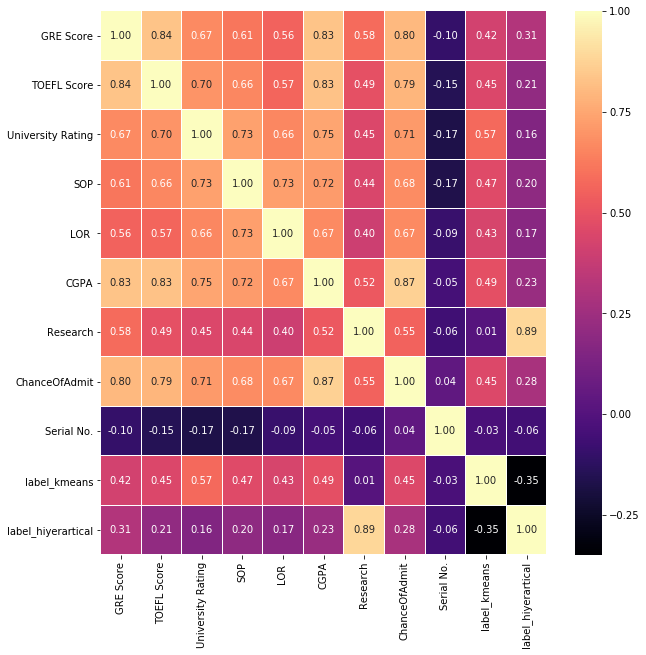

In [50]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### <a id='ThreeLinearRegression'>The Three Features for Linear Regression</a>

* The first results for Linear Regression (7 features):
<br> r_square score:  0.821208259148699

* The results for Linear Regression now (3 features):                               
r_square score:  0.8212241793299223

* The two results are very close. If these 3 features (CGPA, GRE SCORE, and TOEFL SCORE) are used instead of all 7 features together, the result is not bad and performance is increased because less calculation is required.                                 


In [52]:
df = pd.read_csv("Admission_Predict.csv",sep = ",")
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
newDF = pd.DataFrame()
newDF["GRE Score"] = df["GRE Score"]
newDF["TOEFL Score"] = df["TOEFL Score"]
newDF["CGPA"] = df["CGPA"]
newDF["Chance of Admit"] = df["Chance of Admit"]

y_new = df["Chance of Admit"].values
x_new = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train_new, x_test_new,y_train_new, y_test_new = train_test_split(x_new,y_new,test_size = 0.20,random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(x_train_new,y_train_new)
y_head_lr_new = lr_new.predict(x_test_new)

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test_new,y_head_lr_new))


r_square score:  0.8212241793299225


## Applying ANN and Analysing 

In [21]:
admt=pd.read_csv('Admission_Predict.csv')

In [22]:
admt.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
admt.rename(columns={'Serial No.':'Srno','GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UnivRating','Chance of Admit ':'Chance'},inplace=True)

In [26]:
admt.head()

,Srno,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
admt.drop('Srno', axis=1, inplace=True)
admt.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
def modiffy(row):
    if row['Chance'] > 0.7 :
        return 1
    else :
        return 0
admt['Admit'] = admt.apply(modiffy,axis=1)
admttemp = admt.drop(['Chance'], axis=1)

del admttemp

In [31]:
admt_sort=admt.sort_values(by=admt.columns[-1],ascending=False)

In [32]:
X=admt_sort.iloc[:,0:8].values

y=admt_sort.iloc[:,8].values
#X
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

In [34]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

In [35]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

In [36]:
classifier_6=Sequential()

In [37]:
classifier_6.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=8))

/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [38]:
classifier_6.add(Dense(output_dim=5,init='uniform',activation='relu'))

/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [39]:
classifier_6.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [40]:
classifier_6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
classifier_6.fit(X_train, y_train,batch_size=10,nb_epoch=100)

/Users/melon/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
320/320 [==============================] - 0s 870us/step - loss: 0.6921 - acc: 0.5719
Epoch 2/100
320/320 [==============================] - 0s 468us/step - loss: 0.6880 - acc: 0.5781
Epoch 3/100
320/320 [==============================] - 0s 443us/step - loss: 0.6743 - acc: 0.6156
Epoch 4/100
320/320 [==============================] - 0s 438us/step - loss: 0.6429 - acc: 0.8125
Epoch 5/100
320/320 [==============================] - 0s 419us/step - loss: 0.5881 - acc: 0.8719
Epoch 6/100
320/320 [==============================] - 0s 412us/step - loss: 0.5168 - acc: 0.8625
Epoch 7/100
320/320 [==============================] - 0s 354us/step - loss: 0.4425 - acc: 0.8719
Epoch 8/100
320/320 [==============================] - 0s 401us/step - loss: 0.3824 - acc: 0.8750
Epoch 9/100
320/320 [==============================] - 0s 404us/step - loss: 0.3409 - acc: 0.8750
Epoch 10/100
320/320 [==============================] - 0s 418us/step - loss: 0.3138 - acc: 0.8750
Epoch 11/100
320/32

In [42]:
y_pred=classifier_6.predict(X_test)
y_pred=(y_pred>0.7)
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [43]:
score = classifier_6.evaluate(X_test, y_test)
print(score)

80/80 [==============================] - 0s 601us/step
[0.12140675634145737, 0.925]
